In [421]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [422]:
df = pd.read_csv("Top_movies_rated.csv")

# **Dataset cleaning**

In [423]:
df.head()

,Title,Year,Director,Genre,Duration,Gross,Rating
0,The Shawshank Redemption,(1994),Frank Darabont,Drama,142 min,$28.34M,9.3
1,The Dark Knight,(2008),Christopher Nolan,"Action, Crime, Drama",152 min,$534.86M,9.0
2,Inception,(2010),Christopher Nolan,"Action, Adventure, Sci-Fi",148 min,$292.58M,8.8
3,Fight Club,(1999),David Fincher,Drama,139 min,$37.03M,8.8
4,Forrest Gump,(1994),Robert Zemeckis,"Drama, Romance",142 min,$330.25M,8.8


In [424]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Title     69 non-null     object 
 1   Year      70 non-null     object 
 2   Director  70 non-null     object 
 3   Genre     70 non-null     object 
 4   Duration  70 non-null     object 
 5   Gross     70 non-null     object 
 6   Rating    70 non-null     float64
dtypes: float64(1), object(6)
memory usage: 4.0+ KB


In [425]:
# Check the null value in "Title"
null_value = df[df["Title"].isnull()]
null_value

,Title,Year,Director,Genre,Duration,Gross,Rating
50,NaN,(1985),Robert Zemeckis,"Adventure, Comedy, Sci-Fi",116 min,$210.61M,8.5


In [426]:
# After checking in the csv file, replace the null value by the right title
df["Title"].fillna("Back to the future", inplace=True)

In [427]:
# Check the null value was replaced correctly in the index 50
df.loc[50]

Title              Back to the future
Year                           (1985)
Director              Robert Zemeckis
Genre       Adventure, Comedy, Sci-Fi
Duration                      116 min
Gross                        $210.61M
Rating                            8.5
Name: 50, dtype: object

In [428]:
# Check there is no null value anymore in the "Title" field
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Title     70 non-null     object 
 1   Year      70 non-null     object 
 2   Director  70 non-null     object 
 3   Genre     70 non-null     object 
 4   Duration  70 non-null     object 
 5   Gross     70 non-null     object 
 6   Rating    70 non-null     float64
dtypes: float64(1), object(6)
memory usage: 4.0+ KB


In [429]:
# Remove () from "Year" values
df["Year"] = df["Year"].str.replace("[()]", "", regex=True)

# Change the type of "Year"
df["Year"] = pd.to_datetime(df["Year"]).dt.year

In [430]:
# Remove "$" and "M" from "Gross" field
df["Gross"] = df["Gross"].str.replace("$", "", regex=True)
df["Gross"] = df["Gross"].str.replace("M", "", regex=True)

# Rename "Gross" field
df = df.rename(columns={"Gross": "Gross ($ millions)"})

# Change the type of "Gross ($ millions)"
df["Gross ($ millions)"] = df["Gross ($ millions)"].astype(float)

In [431]:
# Remove "min" from "Duration" field
df["Duration"] = df["Duration"].str.replace("min", "")

# Rename "Duration" field
df = df.rename(columns={"Duration": "Duration (min)"})

# Change the type of "Duration (min)"
df["Duration (min)"] = df["Duration (min)"].astype(int)

In [432]:
df.head()

,Title,Year,Director,Genre,Duration (min),Gross ($ millions),Rating
0,The Shawshank Redemption,1994,Frank Darabont,Drama,142,28.34,9.3
1,The Dark Knight,2008,Christopher Nolan,"Action, Crime, Drama",152,534.86,9.0
2,Inception,2010,Christopher Nolan,"Action, Adventure, Sci-Fi",148,292.58,8.8
3,Fight Club,1999,David Fincher,Drama,139,37.03,8.8
4,Forrest Gump,1994,Robert Zemeckis,"Drama, Romance",142,330.25,8.8


In [433]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Title               70 non-null     object 
 1   Year                70 non-null     int64  
 2   Director            70 non-null     object 
 3   Genre               70 non-null     object 
 4   Duration (min)      70 non-null     int64  
 5   Gross ($ millions)  70 non-null     float64
 6   Rating              70 non-null     float64
dtypes: float64(2), int64(2), object(3)
memory usage: 4.0+ KB


In [434]:
# Save the cleaned dataset
df.to_csv("Top_movies_cleaned.csv")

# **Dataset analysis**

### 1. Which director has the highest number of movies in the top 50 rated movies?

In [435]:
# Select the top 50
df_50 = df.sort_values("Rating", ascending=False).head(50)

In [436]:
df_50.head()

,Title,Year,Director,Genre,Duration (min),Gross ($ millions),Rating
0,The Shawshank Redemption,1994,Frank Darabont,Drama,142,28.34,9.3
8,The Godfather,1972,Francis Ford Coppola,"Crime, Drama",175,134.97,9.2
28,The Godfather Part II,1974,Francis Ford Coppola,"Crime, Drama",202,57.30,9.0
9,The Lord of the Rings: The Return of the King,2003,Peter Jackson,"Action, Adventure, Drama",201,377.85,9.0
21,Schindler's List,1993,Steven Spielberg,"Biography, Drama, History",195,96.90,9.0


In [437]:
# Group by director
df_50_director = df_50.groupby("Director")["Title"].count()

# Find the director with the highest number of movies in the top 50
max_movies_director = df_50_director.idxmax()
print(max_movies_director, "has the highest number of movies in the top 50 rated movies.")

Christopher Nolan has the highest number of movies in the top 50 rated movies.


### 2. Which genre has the highest rating among the top 50 rated movies?

In [438]:
# Split the row where there are several genres

split_genre = [] # Create an empty list
for index, row in df_50.iterrows(): # Iterate through each row in df_50
    # Get the "Genre" and "Rating" values
    genre = row['Genre']
    rating = row['Rating']
    for genre in genre.split(', '):  # Split the "Genre" by comma and space to get individual genres
        # Create a tuple with the individual genre and the corresponding rating and append it to the "split_genres" list
        split_genre.append((genre, rating))

print(split_genre)

[('Drama', 9.3), ('Crime', 9.2), ('Drama', 9.2), ('Crime', 9.0), ('Drama', 9.0), ('Action', 9.0), ('Adventure', 9.0), ('Drama', 9.0), ('Biography', 9.0), ('Drama', 9.0), ('History', 9.0), ('Action', 9.0), ('Crime', 9.0), ('Drama', 9.0), ('Crime', 8.9), ('Drama', 8.9), ('Action', 8.8), ('Adventure', 8.8), ('Sci-Fi', 8.8), ('Drama', 8.8), ('Drama', 8.8), ('Romance', 8.8), ('Action', 8.8), ('Adventure', 8.8), ('Drama', 8.8), ('Action', 8.8), ('Adventure', 8.8), ('Drama', 8.8), ('Biography', 8.7), ('Crime', 8.7), ('Drama', 8.7), ('Biography', 8.7), ('Crime', 8.7), ('Drama', 8.7), ('Action', 8.7), ('Adventure', 8.7), ('Fantasy', 8.7), ('Action', 8.7), ('Sci-Fi', 8.7), ('Action', 8.6), ('Sci-Fi', 8.6), ('Crime', 8.6), ('Drama', 8.6), ('Thriller', 8.6), ('Drama', 8.6), ('War', 8.6), ('Action', 8.6), ('Sci-Fi', 8.6), ('Action', 8.6), ('Adventure', 8.6), ('Fantasy', 8.6), ('Crime', 8.6), ('Drama', 8.6), ('Mystery', 8.6), ('Crime', 8.6), ('Drama', 8.6), ('Fantasy', 8.6), ('Action', 8.5), ('Crime

In [439]:
# Create a dataframe with the genre and the corresponding rating
df_genre_rating = pd.DataFrame(split_genre, columns=["Genre", "Rating"])

# Group by genre
df_genre_rating = df_genre_rating.groupby("Genre")["Rating"].mean()

# Find the genre with the highest rating in the top 50
max_rating = df_genre_rating.idxmax()

print(max_rating, "genre has the highest rating among the top 50 rated movies.")

Romance genre has the highest rating among the top 50 rated movies.


### 3. What is the gross expenditure of the lowest-rated movies as compared with the highest-rated ones?

In [440]:
# Group by rating
df_rating_gross = df.groupby("Rating")["Gross ($ millions)"].mean()

# Create a dataframe and reset index
df_rating_gross = pd.DataFrame(df_rating_gross)
df_rating_gross.reset_index(inplace=True)

# Sort the dataframe in ascending order based on the "Rating" column
df_rating_gross_sorted = df_rating_gross.sort_values(by="Rating")

# Get the first row, which corresponds to the lowest-rated movie's gross expenditure
lowest_rated_movie_gross = df_rating_gross_sorted.iloc[0]["Gross ($ millions)"]
print("The gross expenditure for the lowest-rated movie is $" + str(round(lowest_rated_movie_gross, 3)), "M.")

# Get the last row, which corresponds to the highest-rated movie's gross expenditure
highest_rated_movie_gross = df_rating_gross_sorted.iloc[-1]["Gross ($ millions)"]
print("The gross expenditure for the highest-rated movie is $" + str(round(highest_rated_movie_gross, 3)), "M.")

The gross expenditure for the lowest-rated movie is $543.198 M.
The gross expenditure for the highest-rated movie is $28.34 M.


We can see that the lowest-rated movie surprisingly had a significantly higher gross expenditure than the highest-rated movie.
To better understand the distribution of ratings and their corresponding gross expenditures, we can visualise all the rating values and compare them against their respective gross expenditure using a bar plot.

Text(0.5, 1.0, 'Analysing Movie Ratings and Gross Expenditure Relationship')

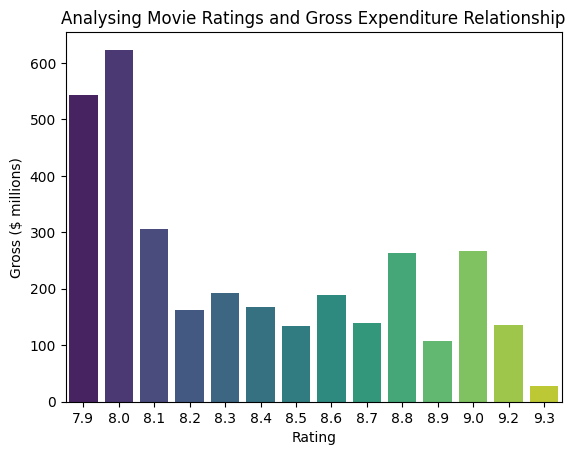

In [441]:
# Visualisation of the rating and gross

# Create the bar plot using Seaborn
sns.barplot(x=df_rating_gross["Rating"], y=df_rating_gross["Gross ($ millions)"], palette="viridis")
plt.xlabel("Rating")
plt.ylabel("Gross ($ millions)")
plt.title("Analysing Movie Ratings and Gross Expenditure Relationship")

Upon initial observation, we can see that higher movie gross don't guarantee a higher rating and there must be other factors which influence a movie's rating. The visual representation provides valuable insights into the complex relationship between gross expenditure and rating, encouraging further investigation into the diverse elements contributing to a movie's overall success and audience reception.